# Guía 1: Operaciones matemáticas básicas

## Aspectos teóricos

1. Deduzca la fórmula de 5 puntos para la derivación numérica.
2. Deduzca la generalización de la regla de Simpson.
3. Dada la integral $$\int_1^b x^{-2} g(x) dx$$ donde $g(x)$ es una función que tiende a un valor constante para grandes valores de $x$, realice un cambio de variables que la transforme en una expresión más adecuada para su evolución numérica, cuando $b$ toma valores muy grandes.
4. Escriba las ecuaciones utilizadas en el método de Newton-Raphson y el de la Secante.
5. Suponga que usted desea ajustar la función $f(x; a_1, a_2,..., a_k)$ con parámetros $a_1, a_2, ..., a_k$ a partir de un conjunto de puntos $\lbrace x_i, y_i \rbrace$ con $i=1, ..., N$. Escriba formalmente la función a minimizar en base al método de los cuadrados mínimos.

## Ejercicios de programación

1. Escriba una función en Python para encontrar numéricamente las raíces de $f(x) = x^2 - 5$. Compare el número de iteraciones necesarias para lograr la convergencia con distintos valores de tolerancia. Compare para los distintos métodos de búsqueda: Bisección, Newton-Raphson y Secante.

In [1]:
import numpy as np

def func(x):
    return x**2 - 5

def dfunc(x):
    return 2 * x

def biseccion(func, a, b, tol=1e-6):
    x = (a + b) / 2
    it = 0
    
    while (b - a) > tol:
        if func(a) * func(b) <= 0:
            b = x
        else:
            a = x
        x = (a + b) / 2
        it += 1

    return x, it

def newton_raphson(func, dfunc, x0, tol=1e-6):
    it = 0
    while True:
        x = x0 - (func(x0) / dfunc(x0))
        
        if np.abs(x - x0) < tol:
            break
            
        it += 1
        
        x0 = x
    
    return x, it
    
def secante(func, x0, x1, tol=1e-6):
    it = 0

    for _ in range(1000):
        x = x1 - func(x1) * (x1 - x0) / (func(x1) - func(x0))
        
        if np.abs((x - x1) / x1) < tol:
            return x, it
        
        x0, x1 = x1, x        
        it += 1
        
    return x, it

tols = np.logspace(-2, -16, num=15)
for tol in tols:
    
    xb, it_b = biseccion(func, 0, 5, tol=tol)
    xnr, it_nr = newton_raphson(func, dfunc, 5, tol=tol)
    xs, it_s = secante(func, 0, 1, tol=tol)
    
    print(tol, it_b, it_nr, it_s)

0.01 9 3 5
0.001 13 4 5
0.0001 16 4 6
1e-05 19 4 6
1e-06 23 4 7
1e-07 26 5 7
1e-08 29 5 7
1e-09 33 5 8
1e-10 36 5 8
1e-11 39 5 8
1e-12 43 5 8
1e-13 46 6 8
1e-14 49 6 9
1e-15 53 6 9
1e-16 55 6 9


2. Escriba una función en Python para evaluar la derivada de la función $\sin(x)$ en el intervalo $[2\pi, 4\pi]$. Analice el resultado para diferentes valores del incremento finito $h$. Estudie cómo varía el error numérico total en función de $h$ y de la precisión utilizada. Analice el error local en cada zona del dominio.

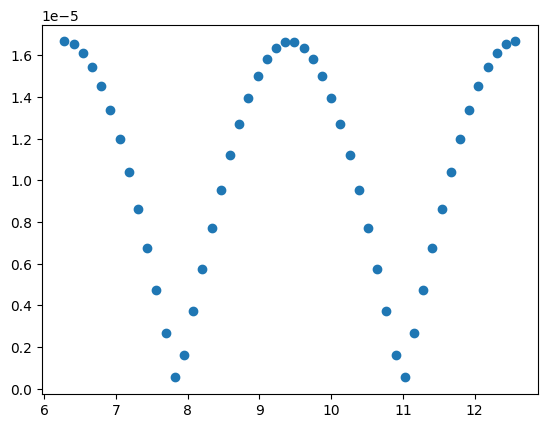

In [2]:
import matplotlib.pyplot as plt

def func(x):
    return np.sin(x)

def dfunc(x):
    return np.cos(x)

def tres_puntos(func, x, h):
    return (func(x + h) - func(x - h)) / (2 * h)

x = np.linspace(2 * np.pi, 4 * np.pi)

plt.scatter(x, np.abs(dfunc(x) - tres_puntos(func, x, 0.01)))
plt.show()

3. Escriba una función en Python para evaluar la integral definida de la función $\cos(x)$ en el intervalo $[0, 1]$. Estudie el efecto del número de particiones del intervalo sobre el error numérico.

In [3]:
def func(x):
    return np.cos(x)

def simpson(func, a, b, intervalos):
    npuntos = intervalos + 1
    x = np.linspace(a, b, num=npuntos)

    h = 1 / intervalos
    
    factor = 2
    integral = func(x[0])
    for i in range(1, npuntos - 1):
        if factor == 2:
            factor = 4
        else:
            factor = 2
        
        integral = integral + factor * func(x[i])
        
    integral = integral + func(x[npuntos - 1])
    
    integral = h * integral / 3 
    
    return integral 
    
aproximacion = simpson(func, 0, 1, 128)
exacta = np.sin(1)
print(aproximacion, exacta, aproximacion - exacta)

0.8414709848253118 0.8414709848078965 1.7415291431177593e-11


4. Use la función `simplex` proporcionada para encontrar la distancia interatómica de equilibrio de la molécula NaCl a partir del siguiente potencial de interacción entre los iones
$$
V(r) = - \frac{e^2}{r} + \alpha e^{- \frac{r}{\rho}}
$$
donde $e^2 = 14.4 eV \cdot A$, $\alpha = 1.09 \cdot 10^3 eV$ y $\rho = 0.33 A$.

In [4]:
import numpy as np
from scipy.optimize import minimize

func = lambda r: 1.09e3 * np.exp(-r / 0.33) - 14.4 / r
minimize(func, 2.0, method="Nelder-Mead")

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -5.247489118341834
             x: [ 2.361e+00]
           nit: 13
          nfev: 26
 final_simplex: (array([[ 2.361e+00],
                       [ 2.360e+00]]), array([-5.247e+00, -5.247e+00]))

5. Usar la funció `simplex` proporcionada para ajustar la función $f(x, a_1, a_2) = e^{-a_1 x} + e^{-a_2 x}$ al conjunto de datos que se encuentra en el archivo `datos.txt`. Tenga en cuenta el ejercicio 5 de la parte teórica. (Sugerencia: Buscar los valores $a_1$ y $a_2$ en el intervalor $[0,1]$).

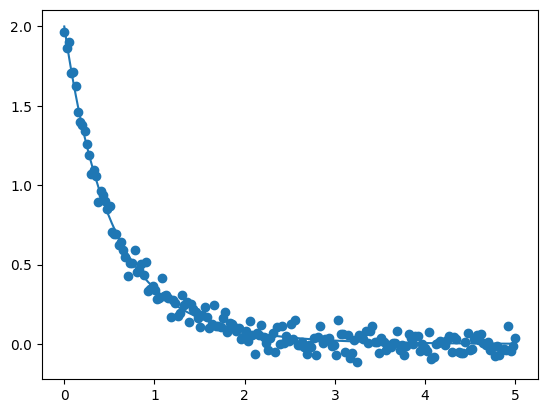

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

x, y = [], []
f = open("datos.txt", "r")

while True:
    l = f.readline()
    if l == "":
        break
    x.append(l.split()[0])
    y.append(l.split()[1])

X = np.array(x, dtype=float)
Y = np.array(y, dtype=float)

def func(a):
    return np.sum((Y - (np.exp(-a[0] * X) + np.exp(-a[1] * X)))**2)

minimize(func, [1, 1], method="Nelder-Mead")

plt.scatter(X, Y)
plt.plot(X, np.exp(-2.589e0 * X) + np.exp(-1.294e0 * X))